# Installing Necessary Libraries

Install the ChEMBL web service package so that we can retrieve bioactivity data 

In [1]:
# !pip install chembl_webresource_client

# Import Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from chembl_webresource_client.new_client import new_client

# Search for Target Protein

## Target Search for Zika Virus

In [20]:
## Set the target
target = new_client.target
target_query = target.search("zika")
targets = pd.DataFrame.from_dict(target_query)
targets.head()

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Zika virus,Zika virus,18.0,False,CHEMBL4296612,[],ORGANISM,64320


In [21]:
## Selcvting the target based on chembl id
selected_target = targets.target_chembl_id.values[0]
selected_target

'CHEMBL4296612'

In [22]:
## Retrive the bioactivity data for CHEMBL613120
df = pd.DataFrame.from_dict(new_client.activity.filter(target_chembl_id = selected_target))
df.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,17969957,[],CHEMBL3995698,"Potency index, ratio of chloroquine EC50 to te...",F,None,None,BAO_0000179,...,Zika virus,Zika virus,64320,None,None,Ratio EC50,None,None,None,3.0
1,None,None,17969958,[],CHEMBL3995697,"Potency index, ratio of mefloquine EC50 to tes...",F,None,None,BAO_0000179,...,Zika virus,Zika virus,64320,None,None,Ratio EC50,None,None,None,3.0
2,None,None,17969959,[],CHEMBL3995697,"Potency index, ratio of mefloquine EC50 to tes...",F,None,None,BAO_0000179,...,Zika virus,Zika virus,64320,None,None,Ratio EC50,None,None,None,5.0
3,None,None,17969960,[],CHEMBL3995697,"Potency index, ratio of mefloquine EC50 to tes...",F,None,None,BAO_0000179,...,Zika virus,Zika virus,64320,None,None,Ratio EC50,None,None,None,2.0
4,None,None,17969961,[],CHEMBL3995697,"Potency index, ratio of mefloquine EC50 to tes...",F,None,None,BAO_0000179,...,Zika virus,Zika virus,64320,None,None,Ratio EC50,None,None,None,5.0


In [23]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset")

There are 1028 rows and 46 columns in the dataset


In [24]:
print("Unique values in type: ", df["type"].unique())

Unique values in type:  ['Ratio EC50' 'EC50' 'INH' 'Activity' 'IC50' 'Ratio IC50' 'log10 TCID50'
 'FC' 'Time' 'Survival' 'EC68' 'EC' 'EC90']


In [25]:
## Count of each type
df.groupby(["type"])["type"].count()

type
Activity        237
EC               37
EC50            262
EC68             26
EC90             32
FC                2
IC50            215
INH             173
Ratio EC50       15
Ratio IC50       10
Survival         15
Time              1
log10 TCID50      3
Name: type, dtype: int64

#### Which type to consider: EC50 / IC50?

##### EC50 (Half Maximal Effective Concentration):

**Why it matters:** It helps scientists understand how much of a drug is needed to see a significant effect, which is important for dosing and effectiveness.

##### IC50 (Half Maximal Inhibitory Concentration):

**Why it matters:** It tells researchers how much of a substance is needed to effectively reduce or block a biological activity, which is crucial for developing inhibitors or drugs that need to stop a specific process.

Considering EC50 for our work

In [26]:
## Saving the dataset
new_df = df[df["type"] == "EC50"]
new_df.to_csv("zika_bioactivity_type_EC50.csv", index = False)

# Loading the Dataset

In [29]:
df = pd.read_csv("zika_bioactivity_type_EC50.csv")
df.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,17969975,[],CHEMBL3995695,Antiviral activity against Zika virus infected...,F,NaN,NaN,BAO_0000188,...,Zika virus,Zika virus,64320,NaN,NaN,EC50,uM,UO_0000065,NaN,12.0
1,NaN,NaN,17969976,[],CHEMBL3995695,Antiviral activity against Zika virus infected...,F,NaN,NaN,BAO_0000188,...,Zika virus,Zika virus,64320,NaN,NaN,EC50,uM,UO_0000065,NaN,1.4
2,NaN,NaN,17969977,[],CHEMBL3995695,Antiviral activity against Zika virus infected...,F,NaN,NaN,BAO_0000188,...,Zika virus,Zika virus,64320,NaN,NaN,EC50,uM,UO_0000065,NaN,0.8
3,NaN,NaN,17969978,[],CHEMBL3995695,Antiviral activity against Zika virus infected...,F,NaN,NaN,BAO_0000188,...,Zika virus,Zika virus,64320,NaN,NaN,EC50,uM,UO_0000065,NaN,2.0
4,NaN,NaN,17969979,[],CHEMBL3995695,Antiviral activity against Zika virus infected...,F,NaN,NaN,BAO_0000188,...,Zika virus,Zika virus,64320,NaN,NaN,EC50,uM,UO_0000065,NaN,0.8


## Data Wrangling and Feature Engineering

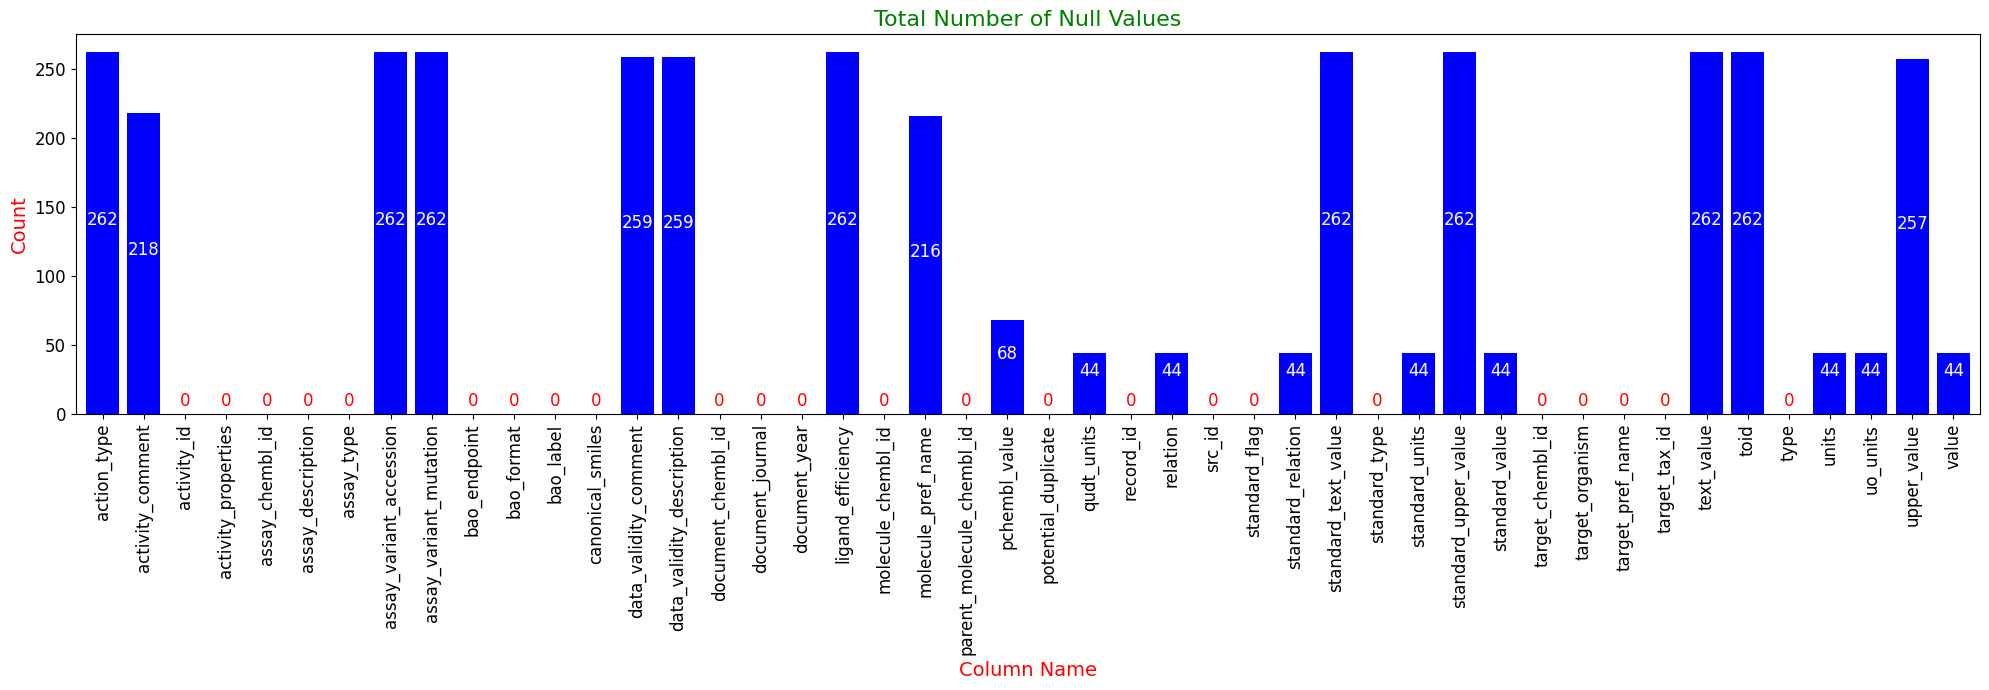

In [30]:
## Check for Null Values
plt.figure(figsize = (20,7))
ax = df.isnull().sum().plot(kind = "bar", color = "blue", width = 0.8)

for p in ax.patches:
    height = int(p.get_height())
    if height!= 0:
        color = "white"
        ax.annotate(str(height), 
                    xy = (p.get_x() + p.get_width()/2., height//2), 
                    textcoords = "offset points", 
                    xytext = (0,3), 
                    ha = "center", 
                    va = "bottom", color = color, 
                    fontsize = 12)
    else:
        color = "red"
        ax.annotate(str(height), 
                    xy = (p.get_x() + p.get_width()/2., height//2), 
                    textcoords = "offset points", 
                    xytext = (0,3), ha = "center",
                    va = "bottom", color = color, 
                    fontsize = 12)
        
plt.xlabel("Column Name", fontsize = 14, color = "r")
plt.ylabel("Count", fontsize = 14, color = "r")
plt.title("Total Number of Null Values", fontsize = 16, color = "g")
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()
plt.show()

In [31]:
## Drop rows with null values in standard_value column
df.dropna(subset = ["standard_value"], axis = 0, inplace = True)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,17969975,[],CHEMBL3995695,Antiviral activity against Zika virus infected...,F,NaN,NaN,BAO_0000188,...,Zika virus,Zika virus,64320,NaN,NaN,EC50,uM,UO_0000065,NaN,12.0
1,NaN,NaN,17969976,[],CHEMBL3995695,Antiviral activity against Zika virus infected...,F,NaN,NaN,BAO_0000188,...,Zika virus,Zika virus,64320,NaN,NaN,EC50,uM,UO_0000065,NaN,1.4
2,NaN,NaN,17969977,[],CHEMBL3995695,Antiviral activity against Zika virus infected...,F,NaN,NaN,BAO_0000188,...,Zika virus,Zika virus,64320,NaN,NaN,EC50,uM,UO_0000065,NaN,0.8
3,NaN,NaN,17969978,[],CHEMBL3995695,Antiviral activity against Zika virus infected...,F,NaN,NaN,BAO_0000188,...,Zika virus,Zika virus,64320,NaN,NaN,EC50,uM,UO_0000065,NaN,2.0
4,NaN,NaN,17969979,[],CHEMBL3995695,Antiviral activity against Zika virus infected...,F,NaN,NaN,BAO_0000188,...,Zika virus,Zika virus,64320,NaN,NaN,EC50,uM,UO_0000065,NaN,0.8


**Info**: Higher the standard value, lower the potency of the drug. Standard Value is the concentration of the drug required to produce the result

### Labeling the Drug as Active, Intermediate and Inactive

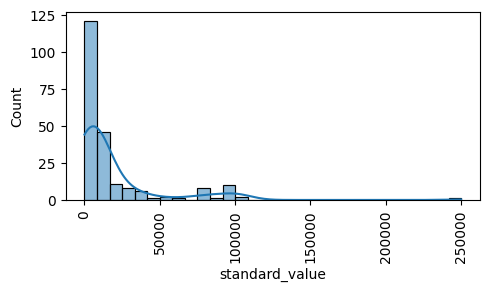

In [36]:
## Standrd Value Distribution
plt.figure(figsize = (5,3))
sns.histplot(df["standard_value"], kde = True, bins = 30)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

**The data is sparsely distributed with 0 being prominently present**

* 1 µM = 10^-6 M
* 1 nm = 10^-9 M

So, 

* Active: < 1 µM =  < 1000 nM
* Inactive: > 10 µM = > 10000 nM

In [37]:
bioactivity_class = []
for i in df["standard_value"].values:
    if float(i)<=1000:
        bioactivity_class.append("Active")
    elif float(i)>=10000:
        bioactivity_class.append("Inactive")
    else:
        bioactivity_class.append("Intermediate")
bioactivity_class[:5]

['Inactive', 'Intermediate', 'Active', 'Intermediate', 'Active']

### Selecting other columns of our interest

In [38]:
cols = ["molecule_chembl_id", "canonical_smiles", "standard_value"]
df2 = df[cols]
df2["bioactivity_class"] = bioactivity_class
df2.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_7804\1965671447.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["bioactivity_class"] = bioactivity_class


,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL76,CCN(CC)CCCC(C)Nc1ccnc2cc(Cl)ccc12,12000.0,Inactive
1,CHEMBL4087097,FC(F)(F)c1cc(NCCCl)c2cccc(C(F)(F)F)c2n1,1400.0,Intermediate
2,CHEMBL4065673,OCCNc1cc(C(F)(F)F)nc2c(C(F)(F)F)cccc12,800.0,Active
3,CHEMBL4102529,NCCCNc1cc(C(F)(F)F)nc2c(C(F)(F)F)cccc12,2000.0,Intermediate
4,CHEMBL4084581,NCCNc1cc(C(F)(F)F)nc2c(C(F)(F)F)cccc12,800.0,Active


In [41]:
df2.to_csv("bioactivity_preprocessed_data.csv", index = False)